# Data Analysis

Here we need a `.csv` file in order to do the desired analysis.

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import seaborn as sns

In [17]:
df = pd.read_csv('mergedDatalogger_formatted_data_nov1722.csv')

df.head()

,datetime,Datetime,Temp,pH,mV[pH],ORP[mV],EC,EC Abs,RES[KOhm-cm],TDS [ppt],Sal.[psu],Sigma T[sT],Press.[psi],D.O.[%],D.O.[mg/L]
0,2021-11-17 12:46:00,11/17/2021 1:08:37 p. m.,16.86,5.66,92.7,234.7,649,549,1.5,0.325,0.32,0,10.813,66.0,4.67
1,2021-11-17 12:46:05,11/17/2021 1:08:42 p. m.,16.86,5.66,92.7,234.7,649,549,1.5,0.325,0.32,0,10.812,65.4,4.62
2,2021-11-17 12:46:10,11/17/2021 1:08:47 p. m.,16.86,5.66,92.7,234.7,649,549,1.5,0.325,0.32,0,10.811,64.9,4.59
3,2021-11-17 12:46:15,11/17/2021 1:08:52 p. m.,16.86,5.66,92.6,234.7,649,549,1.5,0.325,0.32,0,10.812,64.7,4.57
4,2021-11-17 12:46:20,11/17/2021 1:08:57 p. m.,16.86,5.66,92.6,234.7,649,549,1.5,0.325,0.32,0,10.811,64.5,4.56


In [18]:
df = pd.read_csv('mergedDatalogger_formatted_data_nov1722.csv')
df["datetime"] = pd.to_datetime(df["datetime"])
# df = df.set_index('datetime')
del df["Datetime"]
df["approx datetime"] = df["datetime"].round('1min') # redondeamos a los X mins más cercanos (X según frec. de los videos)

del df["Sigma T[sT]"]
# df = df.sort_index()
df.head(10)

,datetime,Temp,pH,mV[pH],ORP[mV],EC,EC Abs,RES[KOhm-cm],TDS [ppt],Sal.[psu],Press.[psi],D.O.[%],D.O.[mg/L],approx datetime
0,2021-11-17 12:46:00,16.86,5.66,92.7,234.7,649,549,1.5,0.325,0.32,10.813,66.0,4.67,2021-11-17 12:46:00
1,2021-11-17 12:46:05,16.86,5.66,92.7,234.7,649,549,1.5,0.325,0.32,10.812,65.4,4.62,2021-11-17 12:46:00
2,2021-11-17 12:46:10,16.86,5.66,92.7,234.7,649,549,1.5,0.325,0.32,10.811,64.9,4.59,2021-11-17 12:46:00
3,2021-11-17 12:46:15,16.86,5.66,92.6,234.7,649,549,1.5,0.325,0.32,10.812,64.7,4.57,2021-11-17 12:46:00
4,2021-11-17 12:46:20,16.86,5.66,92.6,234.7,649,549,1.5,0.325,0.32,10.811,64.5,4.56,2021-11-17 12:46:00
5,2021-11-17 12:46:25,16.86,5.66,92.6,234.7,649,549,1.5,0.325,0.32,10.811,64.0,4.52,2021-11-17 12:46:00
6,2021-11-17 12:46:30,16.86,5.66,92.6,234.7,649,549,1.5,0.325,0.32,10.811,63.5,4.49,2021-11-17 12:46:00
7,2021-11-17 12:46:35,16.87,5.66,92.7,234.7,649,549,1.5,0.325,0.32,10.813,63.2,4.47,2021-11-17 12:47:00
8,2021-11-17 12:46:40,16.87,5.66,92.7,234.7,649,549,1.5,0.325,0.32,10.814,63.4,4.48,2021-11-17 12:47:00
9,2021-11-17 12:46:45,16.87,5.66,92.7,234.7,649,549,1.5,0.325,0.32,10.813,63.3,4.47,2021-11-17 12:47:00


## Gráficas Datos Datalogger

In [19]:
df.columns

Index(['datetime', 'Temp', 'pH ', 'mV[pH]', 'ORP[mV]', 'EC', 'EC Abs',
       'RES[KOhm-cm]', 'TDS [ppt]', 'Sal.[psu]', 'Press.[psi]', 'D.O.[%]',
       'D.O.[mg/L]', 'approx datetime'],
      dtype='object')

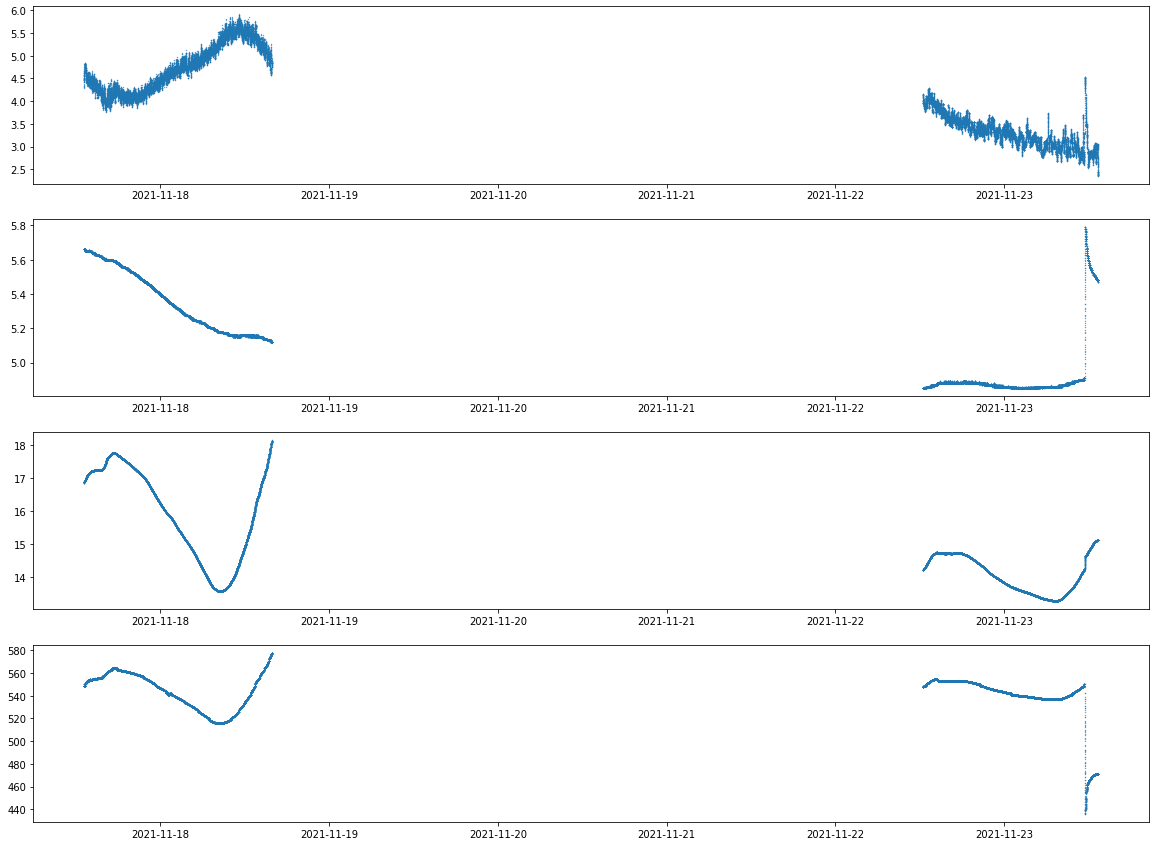

In [12]:
df = pd.read_csv('mergedDatalogger_formatted_data_nov1722.csv')
df["datetime"] = pd.to_datetime(df["Datetime"])
plt.figure(figsize=(20,15))
plt.subplot(4,1,1)
plt.scatter(df['datetime'], df['D.O.[mg/L]'], s=0.1)
plt.subplot(4,1,2)
plt.scatter(df['datetime'], df['pH '], s=0.1)
plt.subplot(4,1,3)
plt.scatter(df['datetime'], df['Temp'], s=0.1)
plt.subplot(4,1,4)
plt.scatter(df['datetime'], df['EC Abs'], s=0.1)

# df = df.set_index('datetime')
# df[['Temp', 'pH ', 'D.O.[mg/L]', 'EC Abs']].plot(subplots=True, figsize=(10,10))

array([<AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>],
      dtype=object)

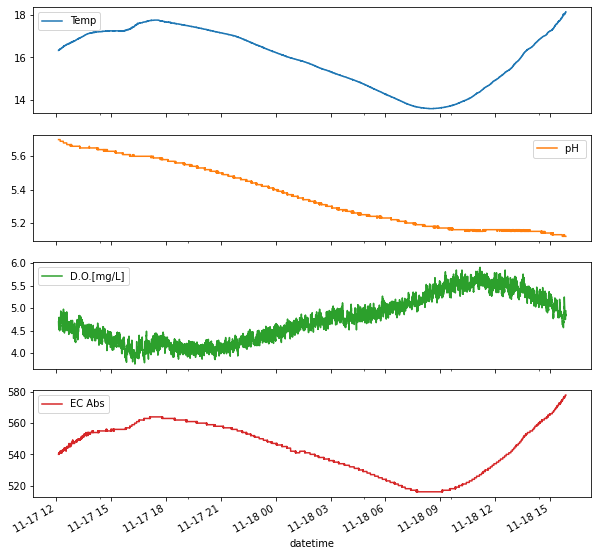

In [27]:
df = pd.read_csv('datalogger_formatted_data_nov17.csv')
df["datetime"] = pd.to_datetime(df["Datetime"])
df = df.set_index('datetime')
df[['Temp', 'pH ', 'D.O.[mg/L]', 'EC Abs']].plot(subplots=True, figsize=(10,10))

array([<AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>],
      dtype=object)

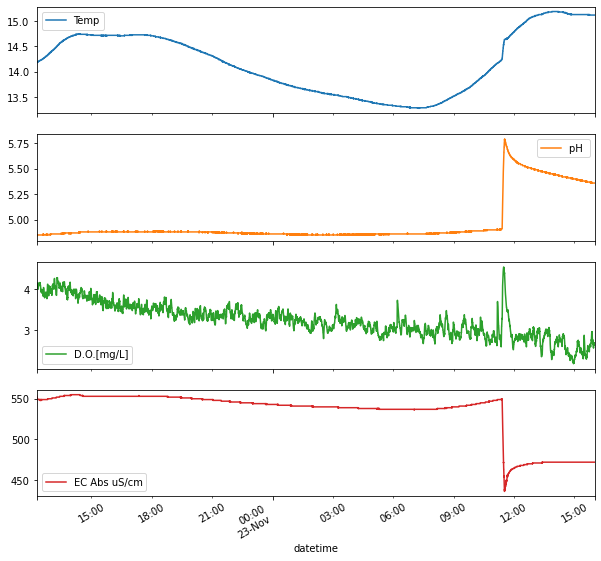

In [30]:
df = pd.read_csv('datalogger_formatted_data_nov22.csv')
df["datetime"] = pd.to_datetime(df["Datetime"])
df = df.set_index('datetime')
df[['Temp', 'pH ', 'D.O.[mg/L]', 'EC Abs uS/cm']].plot(subplots=True, figsize=(10,10))

In [7]:
start_time = df.head(1)['datetime']
end_time = df.tail(1)['datetime']

print(f"Data starts at: {start_time}")
print(f"Data ends at: {end_time}")

Data starts at: 0   2021-11-22 12:16:44
Name: datetime, dtype: datetime64[ns]
Data ends at: 19960   2021-11-23 16:00:04
Name: datetime, dtype: datetime64[ns]


<AxesSubplot:>

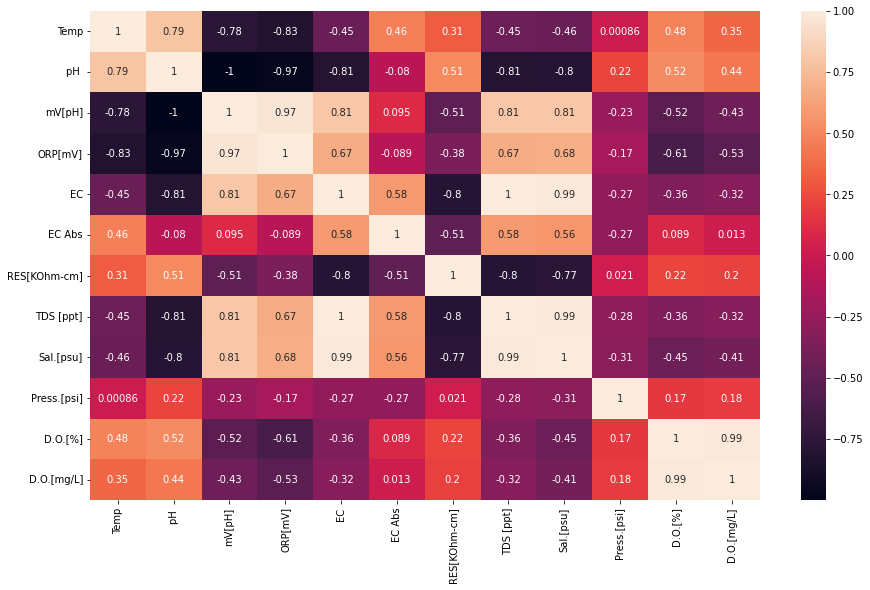

In [20]:
#understanding correlation
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True)

## Strongly Correlated Variables

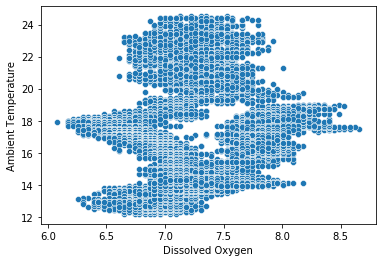

In [7]:
sns.scatterplot(x=df["Dissolved Oxygen"], y=df["Ambient Temperature"], data=df)

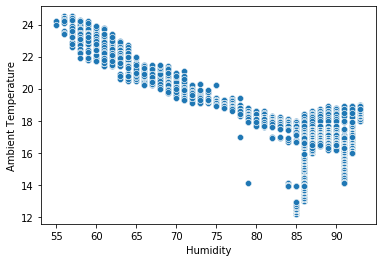

In [8]:
sns.scatterplot(x=df["Humidity"], y=df["Ambient Temperature"], data=df)

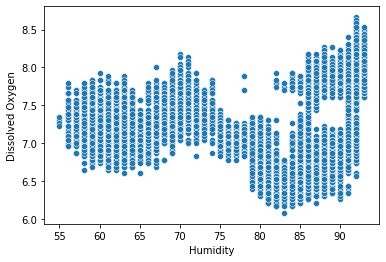

In [9]:
sns.scatterplot(x=df["Humidity"], y=df["Dissolved Oxygen"], data=df)

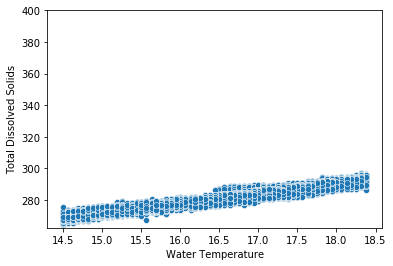

In [10]:
scatter = sns.scatterplot(x=df["Water Temperature"], y=df["Total Dissolved Solids"], data=df)
scatter.set_ylim(top=400);

## Weakly/Not at all Corelated Variables

(25, 40)

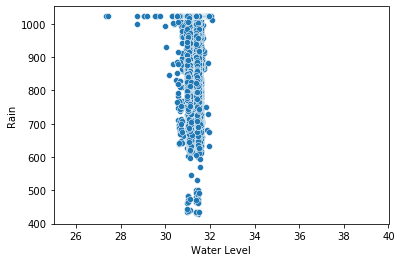

In [11]:
scatter = sns.scatterplot(x=df["Water Level"], y=df["Rain"], data=df)
scatter.set_xlim(left=25, right=40)

# Merging Video Data with Physicochemical Vars

In [ ]:
df = pd.read_csv('mergedDatalogger_formatted_data_nov1722.csv')
df["datetime"] = pd.to_datetime(df["datetime"])
# df = df.set_index('datetime')
del df["Datetime"]
df["approx datetime"] = df["datetime"].round('1min') # redondeamos a los X mins más cercanos (X según frec. de los videos)

del df["Sigma T[sT]"]
df.head(10)

In [29]:
video_df = pd.read_csv('video_data_Nov1718_Nov2223.csv')
video_df["datetime"] = pd.to_datetime(video_df["timestamp"])
del video_df["timestamp"]
del video_df['Video Index']
video_df["approx datetime"] = video_df["datetime"].round('1min') # redondeamos a los X mins más cercanos (X según frec. de los videos)
# video_df = video_df.set_index('datetime')

video_df = video_df.sort_values('datetime', ignore_index=True)
video_df.head()

,Average Distance,Average X,Average Y,Average Pairwise Distance,datetime,approx datetime
0,18706.4849,273,165,140.4328,2021-11-17 12:46:57,2021-11-17 12:47:00
1,21150.1643,280,166,120.7932,2021-11-17 12:47:57,2021-11-17 12:48:00
2,17237.2527,271,146,122.9410,2021-11-17 12:48:58,2021-11-17 12:49:00
3,23746.7889,148,128,127.8629,2021-11-17 12:49:58,2021-11-17 12:50:00
4,28621.4917,163,119,139.1799,2021-11-17 12:50:58,2021-11-17 12:51:00


In [30]:
df.head()

,datetime,Temp,pH,mV[pH],ORP[mV],EC,EC Abs,RES[KOhm-cm],TDS [ppt],Sal.[psu],Press.[psi],D.O.[%],D.O.[mg/L],approx datetime
0,2021-11-17 12:46:00,16.86,5.66,92.7,234.7,649,549,1.5,0.325,0.32,10.813,66.0,4.67,2021-11-17 12:46:00
1,2021-11-17 12:46:05,16.86,5.66,92.7,234.7,649,549,1.5,0.325,0.32,10.812,65.4,4.62,2021-11-17 12:46:00
2,2021-11-17 12:46:10,16.86,5.66,92.7,234.7,649,549,1.5,0.325,0.32,10.811,64.9,4.59,2021-11-17 12:46:00
3,2021-11-17 12:46:15,16.86,5.66,92.6,234.7,649,549,1.5,0.325,0.32,10.812,64.7,4.57,2021-11-17 12:46:00
4,2021-11-17 12:46:20,16.86,5.66,92.6,234.7,649,549,1.5,0.325,0.32,10.811,64.5,4.56,2021-11-17 12:46:00


In [31]:
merged_df = pd.merge(df, video_df, on="approx datetime")
del merged_df['datetime_x'] # (Original formatted_data_ timestamp) Column with the same name
del merged_df['datetime_y'] # (Original video_data timestamp) Column with the same name
merged_df.head()

,Temp,pH,mV[pH],ORP[mV],EC,EC Abs,RES[KOhm-cm],TDS [ppt],Sal.[psu],Press.[psi],D.O.[%],D.O.[mg/L],approx datetime,Average Distance,Average X,Average Y,Average Pairwise Distance
0,16.87,5.66,92.7,234.7,649,549,1.5,0.325,0.32,10.813,63.2,4.47,2021-11-17 12:47:00,18706.4849,273,165,140.4328
1,16.87,5.66,92.7,234.7,649,549,1.5,0.325,0.32,10.814,63.4,4.48,2021-11-17 12:47:00,18706.4849,273,165,140.4328
2,16.87,5.66,92.7,234.7,649,549,1.5,0.325,0.32,10.813,63.3,4.47,2021-11-17 12:47:00,18706.4849,273,165,140.4328
3,16.87,5.66,92.7,234.7,649,549,1.5,0.325,0.32,10.813,63.1,4.46,2021-11-17 12:47:00,18706.4849,273,165,140.4328
4,16.87,5.66,92.6,234.7,650,549,1.5,0.325,0.32,10.813,63.1,4.46,2021-11-17 12:47:00,18706.4849,273,165,140.4328


<AxesSubplot:>

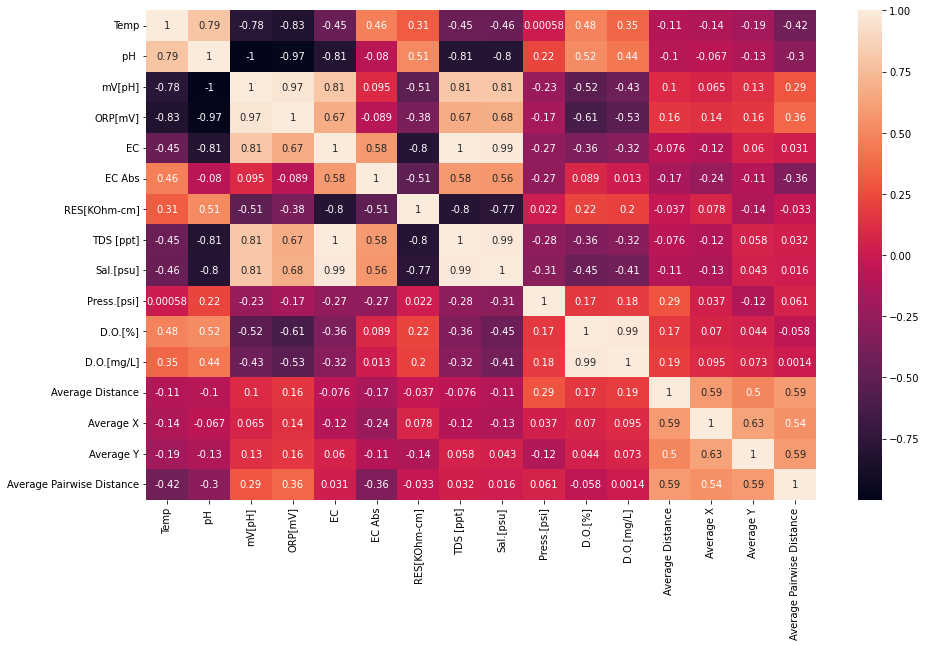

In [32]:
#understanding correlation
plt.figure(figsize = (15,9))
sns.heatmap(merged_df.corr(), annot = True)

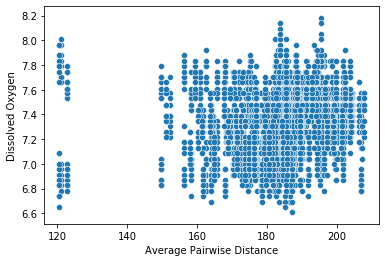

In [29]:
scatter = sns.scatterplot(x=merged_df["Average Pairwise Distance"], y=merged_df["Dissolved Oxygen"], data=df)
# scatter.set_ylim(top=400);